In [1]:
# Sam Brown
# sam_brown@mines.edu
# Goal: Exploring methods to calculate and compare pre-slip and slip tendencies
# Date: 2025-02-26


import sys
sys.path.append("/Users/sambrown04/Documents/SURF/whillans-surf/notebooks/SURF")

# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import butter, filtfilt
from scipy.integrate import simps
import scipy.signal

import my_lib.funcs

# Set path to event files
evts_path = "/Users/sambrown04/Documents/SURF/Events/2010_2010Events2stas" 

In [3]:
# storing events in data frame for use
events_list = my_lib.funcs.load_evt(evts_path)

In [5]:
new_features = my_lib.funcs.extract_event_features(events_list)
new_features[0].head()

,station,pre-slip_area,slip_severity,peak_time,total_delta,start_time
0,la01x,86.120885,6.613400e-07,4755.0,0.319709,2010-11-18 23:03:00
1,la02x,78.146228,5.853301e-07,4860.0,0.296645,2010-11-18 23:03:00
2,la04x,140.100307,6.513987e-07,4845.0,0.295982,2010-11-18 23:03:00
3,la05x,89.826900,3.453581e-07,4785.0,0.208539,2010-11-18 23:03:00
4,la06x,72.676269,9.571907e-07,4785.0,0.335858,2010-11-18 23:03:00


In [14]:
# Find largest and smallest area under curve

# define starting variables for min max
max_total_area = -float('inf')
min_total_area = float('inf')
max_range = -float('inf')

event_max_area = None
event_min_area = None
event_max_range = None

for i, event in enumerate(new_features): # loop through each event 
    total_area = event['pre-slip_area'].sum()
    range_area = event['pre-slip_area'].max() - event['pre-slip_area'].min() # difference of "pre-slip" area

    if total_area > max_total_area:
        max_total_area = total_area
        event_max_area = i

    if total_area < min_total_area:
        min_total_area = total_area
        event_min_area = i

    if range_area > max_range:
        max_range = range_area
        event_max_range = i

print(f"Event with largest pre-slip area: Event {event_max_area} (Total: {max_total_area})")
print(f"Event with smallest pre-slip area: Event {event_min_area} (Total: {min_total_area})")
print(f"Event with largest gap in pre-slip area: Event {event_max_range} (Gap: {max_range})")

Event with largest pre-slip area: Event 252 (Total: 6238.550435003126)
Event with smallest pre-slip area: Event 418 (Total: 4.503547283238731)
Event with largest gap in pre-slip area: Event 475 (Gap: 1778.2804904700606)


In [11]:
all_pre_slip_areas = pd.concat([event['pre-slip_area'] for event in new_features]) # Put all pre slip areas in one dataset

summary_stats = all_pre_slip_areas.describe()
print(summary_stats)

count    3695.000000
mean      137.590025
std       164.807346
min         0.000000
25%        78.785687
50%       107.253754
75%       135.120722
max      1833.968414
Name: pre-slip_area, dtype: float64


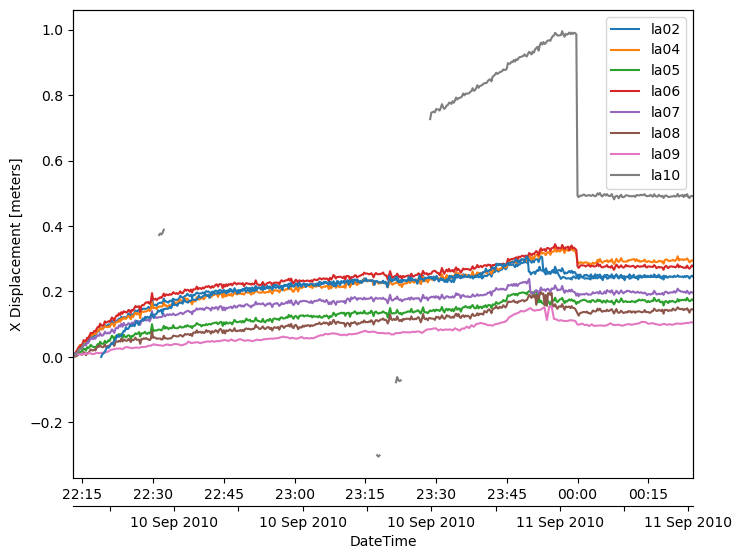

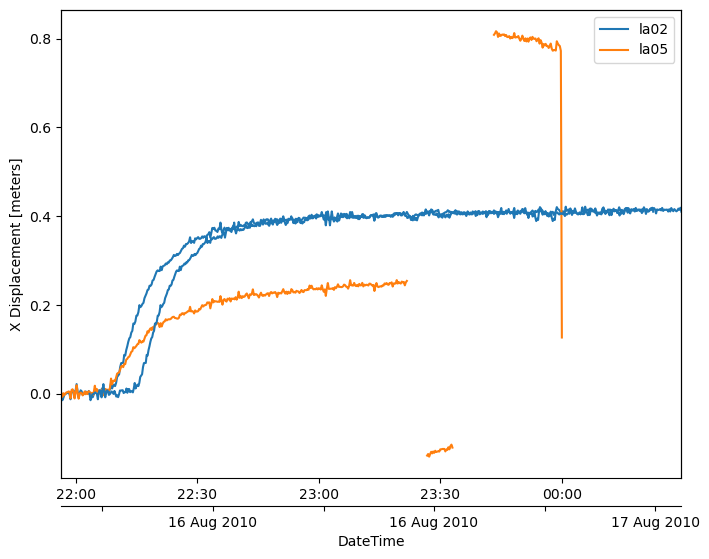

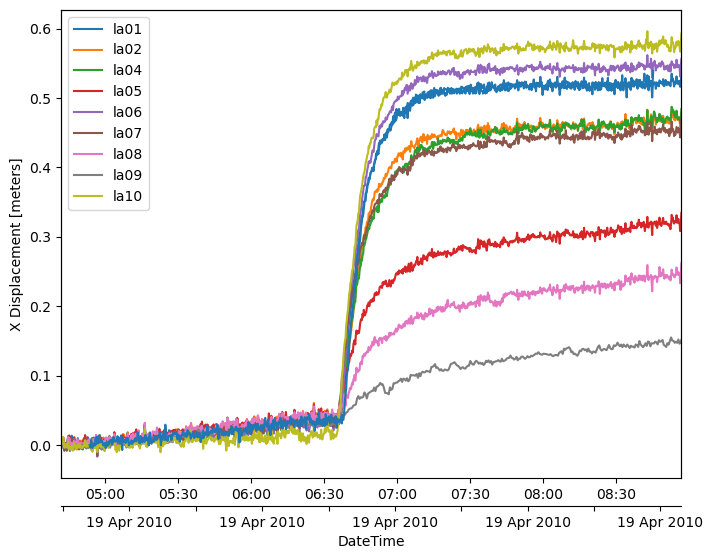

In [12]:
plot_event(events_list[252], var = 'x')
plot_event(events_list[418], var = 'x')
plot_event(events_list[475], var = 'x')

In [13]:
# find events with "sharpest" slip
avg_list = []

#Calculate average 2nd derivs for each event
for i, event in enumerate(new_features):
    average_sharp = event['slip_severity'].mean()
    avg_list.append(average_sharp)
    
max_value = max(avg_list)
max_index = avg_list.index(max_value)

min_value = min(avg_list)
min_index = avg_list.index(min_value)

print(f'The sharpest break is event {max_index} and it is {max_index}')
print(f'The most gradual break is event {min_index} and it is {min_value}')


The sharpest break is event 345 and it is 345
The most gradual break is event 24 and it is 2.2385981562673025e-07


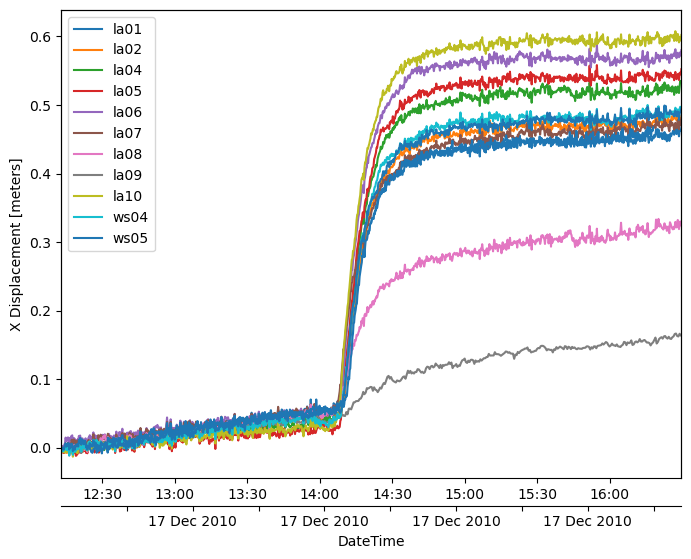

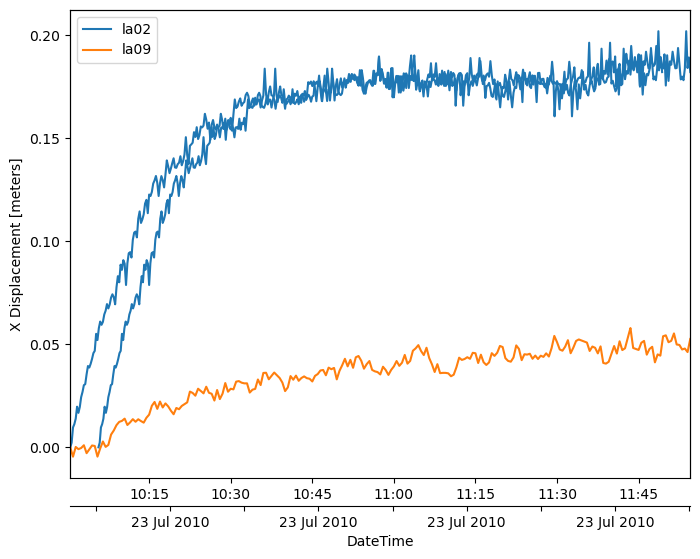

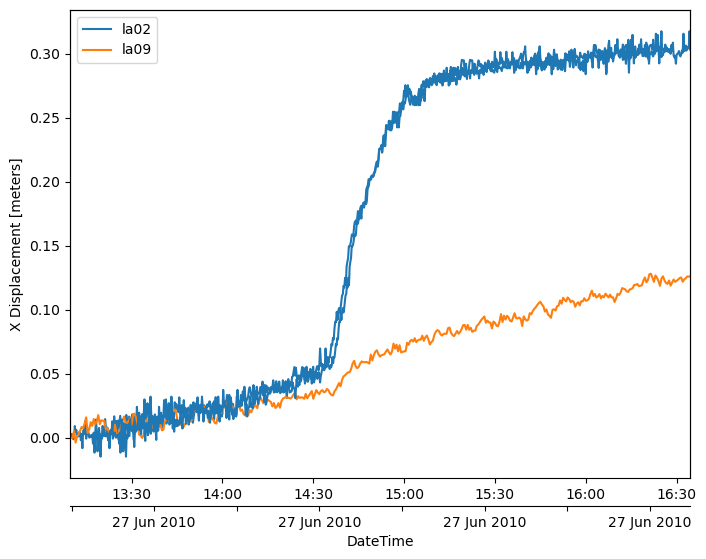

In [14]:
plot_event(events_list[345], var = 'x')
plot_event(events_list[24], var = 'x')
plot_event(events_list[401], var = 'x')

In [15]:
# see if there is a correlation between pre-slippage and severity of slip.
all_pre_slip = pd.concat([df['pre-slip_area'] for df in new_features], ignore_index=True)
all_slip_sev = pd.concat([df['slip_severity'] for df in new_features], ignore_index=True)

result = pd.DataFrame({
    'pres-slip': all_pre_slip,
    'slip-severity': all_slip_sev
})

result

,pres-slip,slip-severity
0,86.120885,6.613400e-07
1,78.146228,5.853301e-07
2,140.100307,6.513987e-07
3,89.826900,3.453581e-07
4,72.676269,9.571907e-07
...,...,...
3690,105.567175,7.391463e-07
3691,100.793511,5.457559e-07
3692,151.882970,2.850382e-07
3693,30.578310,2.260444e-07


Text(0, 0.5, 'Slip Severity (2nd deriv)')

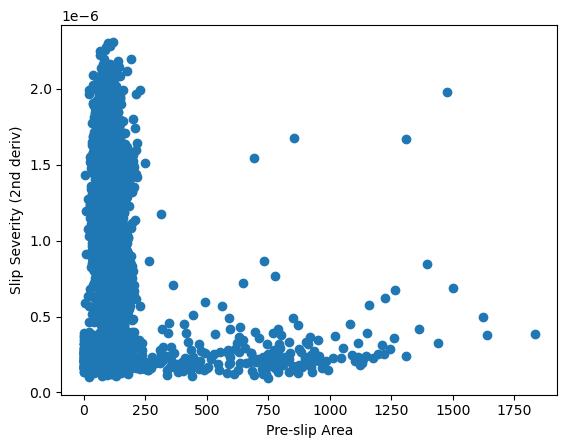

In [16]:
plt.scatter(result['pres-slip'], result['slip-severity'])
plt.xlabel('Pre-slip Area')
plt.ylabel('Slip Severity (2nd deriv)')

It appears that large pre-slip area does not correspond with a large slip severity (all the high pre-slip area points are low on the slip-severity axis).